In [1]:
import glob
import pandas as pd

otterfs = glob.glob("otter/*")
ottert = [0] * len(otterfs)
sealfs = glob.glob("seal/*")
sealt = [1] * len(sealfs)

df = pd.DataFrame({
    "path":otterfs + sealfs, # catfs and dogs are lists
    "ans": ottert + sealt
    
})

df

,path,ans
0,otter\0.jpg,0
1,otter\1.jpg,0
2,otter\10.jpg,0
3,otter\101.jpg,0
4,otter\102.png,0
...,...,...
1113,seal\95.jpg,1
1114,seal\96.jpg,1
1115,seal\97.png,1
1116,seal\98.jpg,1


In [2]:
from keras.applications.vgg16 import VGG16

vgg = VGG16(include_top = False,
      input_shape = (224, 224, 3)
     )
vgg.summary()

Using TensorFlow backend.
W0102 15:15:26.366443 15788 module_wrapper.py:139] From C:\Users\Chien Hua Lo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0102 15:15:26.368438 15788 module_wrapper.py:139] From C:\Users\Chien Hua Lo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0102 15:15:26.372429 15788 module_wrapper.py:139] From C:\Users\Chien Hua Lo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0102 15:15:26.413319 15788 module_wrapper.py:139] From C:\Users\Chien Hua Lo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0102 15:15:26.747425 15788 module_wrapper.py

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [3]:
from keras.models import Model
from keras.layers import Dense, Dropout, Flatten

from keras.layers import BatchNormalization
x = BatchNormalization()(vgg.output)

# MLP
# trainable: before compile
for l in vgg.layers:
    l.trainable = False # cannot be trained again

x = Flatten()(x)
x = Dense(256, activation = "relu")(x)
x = Dropout(0.25)(x)
out = Dense(2, activation = "softmax")(x)
model = Model(inputs = vgg.input, outputs = out)
model.summary()

W0102 15:15:28.082040 15788 module_wrapper.py:139] From C:\Users\Chien Hua Lo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

W0102 15:15:28.136887 15788 module_wrapper.py:139] From C:\Users\Chien Hua Lo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0102 15:15:28.172791 15788 deprecation.py:506] From C:\Users\Chien Hua Lo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3445: calling dropout (from tensorflow.python.ops.nn_ops) with keep_prob is deprecated and will be removed in a future version.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [4]:
model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "adam",
             metrics = ["accuracy"])

W0102 15:15:28.217677 15788 module_wrapper.py:139] From C:\Users\Chien Hua Lo\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0102 15:15:28.243603 15788 module_wrapper.py:139] From C:\Users\Chien Hua Lo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3341: The name tf.log is deprecated. Please use tf.math.log instead.



In [5]:
import numpy as np
from keras.preprocessing.image import load_img
from keras.applications.vgg16 import preprocess_input

p = df.iloc[0]["path"]
img = load_img(p, target_size = (224, 224)).convert("RGB")
img_np = np.array(img)
img_pre = preprocess_input(img_np)
img_pre

array([[[ -87.939   ,  -92.779   ,  -99.68    ],
        [ -87.939   ,  -94.779   ,  -94.68    ],
        [ -72.939   ,  -76.779   ,  -79.68    ],
        ...,
        [ -50.939003,  -67.779   ,  -69.68    ],
        [ -54.939003,  -70.779   ,  -75.68    ],
        [ -62.939003,  -78.779   ,  -83.68    ]],

       [[ -79.939   ,  -75.779   ,  -91.68    ],
        [ -52.939003,  -49.779   ,  -63.68    ],
        [ -51.939003,  -47.779   ,  -65.68    ],
        ...,
        [ -49.939003,  -66.779   ,  -68.68    ],
        [ -53.939003,  -69.779   ,  -74.68    ],
        [ -61.939003,  -77.779   ,  -82.68    ]],

       [[ -39.939003,  -29.779   ,  -44.68    ],
        [ -39.939003,  -30.779   ,  -49.68    ],
        [ -31.939003,  -20.779   ,  -45.68    ],
        ...,
        [ -55.939003,  -69.779   ,  -72.68    ],
        [ -52.939003,  -66.779   ,  -71.68    ],
        [ -60.939003,  -74.779   ,  -79.68    ]],

       ...,

       [[ -54.939003,  -56.779   ,  -73.68    ],
        [ -

In [6]:
def preprocess(path):
    img = load_img(path, target_size = (224, 224)).convert("RGB")
    img_np = np.array(img)
    img_pre = preprocess_input(img_np)
    return img_pre

def get_images(paths, targets, batch = 20):
    idx = np.random.randint(0, len(paths), batch)
    ps = paths[idx]
    xs = np.array(list(map(preprocess, ps)))
    ys = targets[idx]
    return (ps, xs, ys)

In [7]:
from sklearn.model_selection import train_test_split
x = np.array(df["path"])
y = np.array(df["ans"])
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                   test_size = 0.1)

In [8]:
for i in range(10):
    print("-" * 15, "Times:", i, "-" * 15)
    _, xs, ys = get_images(x_train, y_train)
    train_loss = model.train_on_batch(xs, ys)
    print("[Train]:", train_loss)

    _, xs, ys = get_images(x_test, y_test)
    val_loss = model.test_on_batch(xs, ys)
    print("[Validate]:", val_loss)

--------------- Times: 0 ---------------


W0102 15:15:29.250515 15788 deprecation.py:323] From C:\Users\Chien Hua Lo\Anaconda3\lib\site-packages\tensorflow_core\python\ops\math_grad.py:1424: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0102 15:15:29.330301 15788 module_wrapper.py:139] From C:\Users\Chien Hua Lo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0102 15:15:29.408059 15788 module_wrapper.py:139] From C:\Users\Chien Hua Lo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



[Train]: [1.1363678, 0.5]
[Validate]: [1.5539303, 0.8]
--------------- Times: 1 ---------------
[Train]: [7.8152666, 0.25]
[Validate]: [1.9936463, 0.55]
--------------- Times: 2 ---------------
[Train]: [1.0656941, 0.8]
[Validate]: [0.9325965, 0.8]
--------------- Times: 3 ---------------
[Train]: [0.30752668, 0.95]
[Validate]: [1.7328985, 0.8]
--------------- Times: 4 ---------------
[Train]: [0.75870144, 0.75]
[Validate]: [1.4249423, 0.8]
--------------- Times: 5 ---------------
[Train]: [0.79855597, 0.85]
[Validate]: [0.82765657, 0.9]
--------------- Times: 6 ---------------
[Train]: [0.011643477, 1.0]
[Validate]: [1.1396362, 0.8]
--------------- Times: 7 ---------------
[Train]: [0.670317, 0.8]
[Validate]: [0.43581977, 0.85]
--------------- Times: 8 ---------------
[Train]: [0.9816311, 0.85]
[Validate]: [0.41084152, 0.9]
--------------- Times: 9 ---------------
[Train]: [0.9701272, 0.8]
[Validate]: [0.7287774, 0.85]


In [9]:
_, xs, ys = get_images(x_train, y_train, 100)
model.evaluate(xs, ys)

100/100 [==============================] - 25s 252ms/step


[0.28993344233836976, 0.89]

In [10]:
# observe the results
model.predict(xs)

array([[4.41813936e-05, 9.99955773e-01],
       [9.93869543e-01, 6.13049045e-03],
       [1.00000000e+00, 1.36659115e-10],
       [1.89333549e-11, 1.00000000e+00],
       [5.37224591e-01, 4.62775469e-01],
       [9.53259170e-01, 4.67408597e-02],
       [9.25697207e-01, 7.43027702e-02],
       [1.00000000e+00, 8.42489101e-09],
       [8.71538222e-02, 9.12846148e-01],
       [5.41452244e-02, 9.45854783e-01],
       [9.96312201e-01, 3.68777220e-03],
       [1.00000000e+00, 2.14734859e-20],
       [1.00000000e+00, 1.16358874e-10],
       [1.00000000e+00, 4.29637037e-09],
       [9.99999404e-01, 5.47374043e-07],
       [1.00000000e+00, 5.26117617e-15],
       [9.99995828e-01, 4.13807720e-06],
       [1.00000000e+00, 2.26893460e-09],
       [1.43630235e-02, 9.85636950e-01],
       [1.00000000e+00, 3.49377527e-10],
       [1.00000000e+00, 1.91658907e-15],
       [6.88986455e-12, 1.00000000e+00],
       [3.67846610e-07, 9.99999642e-01],
       [4.27720371e-17, 1.00000000e+00],
       [3.825682

100/100 [==============================] - 25s 252ms/step
命中率： 85.0 %


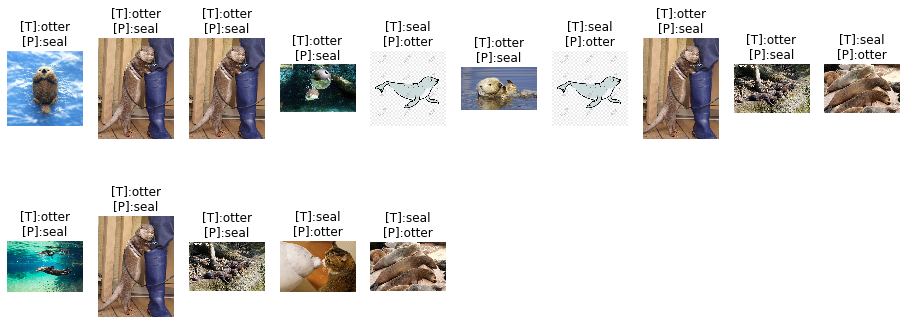

In [11]:
ps, xs, ys = get_images(x_test, y_test, 100)
accu = model.evaluate(xs, ys)[1]
print("命中率：", accu * 100, "%")

# If we use model instead of Sequential, there is no predict_classes
# we need to use predict + argmax
pre = model.predict(xs).argmax(axis = 1)

import matplotlib.pyplot as plt
%matplotlib inline

x_test_1 = np.array(list(map(lambda p:np.array(load_img(p)), ps)))
idx = np.nonzero(pre != ys)[0]
pre_false_img = x_test_1[idx]
pre_false_label = ys[idx]
pre_false_pre = pre[idx]

width = 10
height = len(idx) // width + 1
plt.figure(figsize=(16, 6))

trans = ["otter", "seal"]
z = zip(pre_false_img, pre_false_label, pre_false_pre)
# (i, (z1, z2, z3))
for i, (img, label, p) in enumerate(z):
    plt.subplot(height, width, i+1)
    plt.title("[T]:{}\n[P]:{}".format(trans[label], trans[p]))
    plt.axis("off")
    plt.imshow(img)